# Fama French Benchmark Example
In this notebook, we use pyfolio to analyze the returns of a single stock using the canonical Fama-French factors as the benchmark.

We plot the rolling betas to the Fama-French factors, and run the Bayesian tear sheet for an out-of-sample period of two months.

In [1]:
import pyfolio as pf
import matplotlib.pyplot as plt
%matplotlib inline

# silence warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# get the single stock returns
stock_rets = pf.utils.get_symbol_rets('FB')

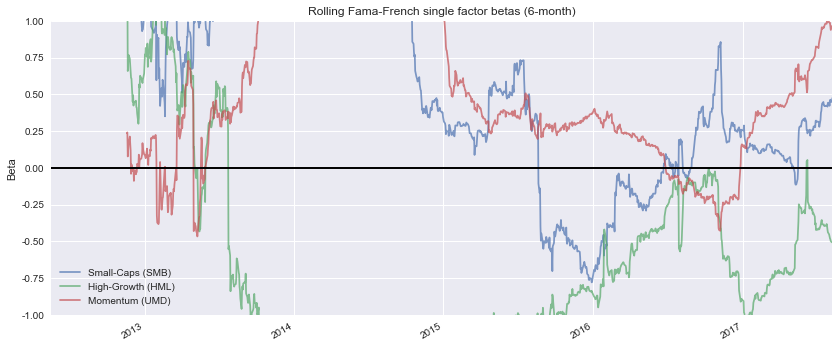

In [3]:
# with just the stock returns, we can plot the rolling betas to the Fama-French factors
# no need to actually compute the rolling betas; pyfolio does that for us!
fig, ax = plt.subplots(figsize=[14, 6])
pf.plotting.plot_rolling_fama_french(stock_rets, ax=ax)

In [4]:
# however, for the bayesian tear sheet, we will actually need the rolling betas
# so use pyfolio to get them
rolling_beta = pf.timeseries.rolling_fama_french(stock_rets)

# pf.timeseries.rolling_beta defaults to a 6-month trailing window
# thus, the first 6 months' data will be NaNs, which we must drop
rolling_beta.dropna(inplace=True)

In [5]:
rolling_beta.head()

,SMB,HML,Mom
Date,,,
2012-11-19 00:00:00+00:00,1.060778,1.284411,0.235843
2012-11-20 00:00:00+00:00,1.066646,1.284218,0.241270
2012-11-21 00:00:00+00:00,1.530077,0.659331,0.077991
2012-11-23 00:00:00+00:00,1.234017,0.768829,0.165740
2012-11-26 00:00:00+00:00,1.368851,0.743062,0.213407


Running T model


Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = -3,077.6:  17%|█▋        | 33238/200000 [00:08<00:44, 3773.24it/s]
Convergence archived at 33300
Interrupted at 33,300 [16%]: Average Loss = -997.01
100%|██████████| 2000/2000 [00:00<00:00, 2016.36it/s]



Finished T model (required 29.01 seconds).

Running BEST model


Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = -3,226.9:  16%|█▋        | 32834/200000 [00:11<01:02, 2672.58it/s]
Convergence archived at 33100
Interrupted at 33,100 [16%]: Average Loss = -1,087.9
100%|██████████| 2500/2500 [00:09<00:00, 259.17it/s]



Finished BEST model (required 39.82 seconds).

Finished plotting Bayesian cone (required 0.18 seconds).

Finished plotting BEST results (required 1.32 seconds).

Finished computing Bayesian predictions (required 0.21 seconds).

Finished plotting Bayesian VaRs estimate (required 0.07 seconds).

Running alpha beta model


Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = -2,882.6:  20%|█▉        | 39243/200000 [00:11<00:50, 3182.03it/s]
Convergence archived at 39400
Interrupted at 39,400 [19%]: Average Loss = -1,305.1
100%|██████████| 2500/2500 [00:08<00:00, 299.99it/s]



Finished running alpha beta model (required 32.21 seconds).

Finished plotting alpha beta model (required 0.65 seconds).

Total runtime was 103.46 seconds.


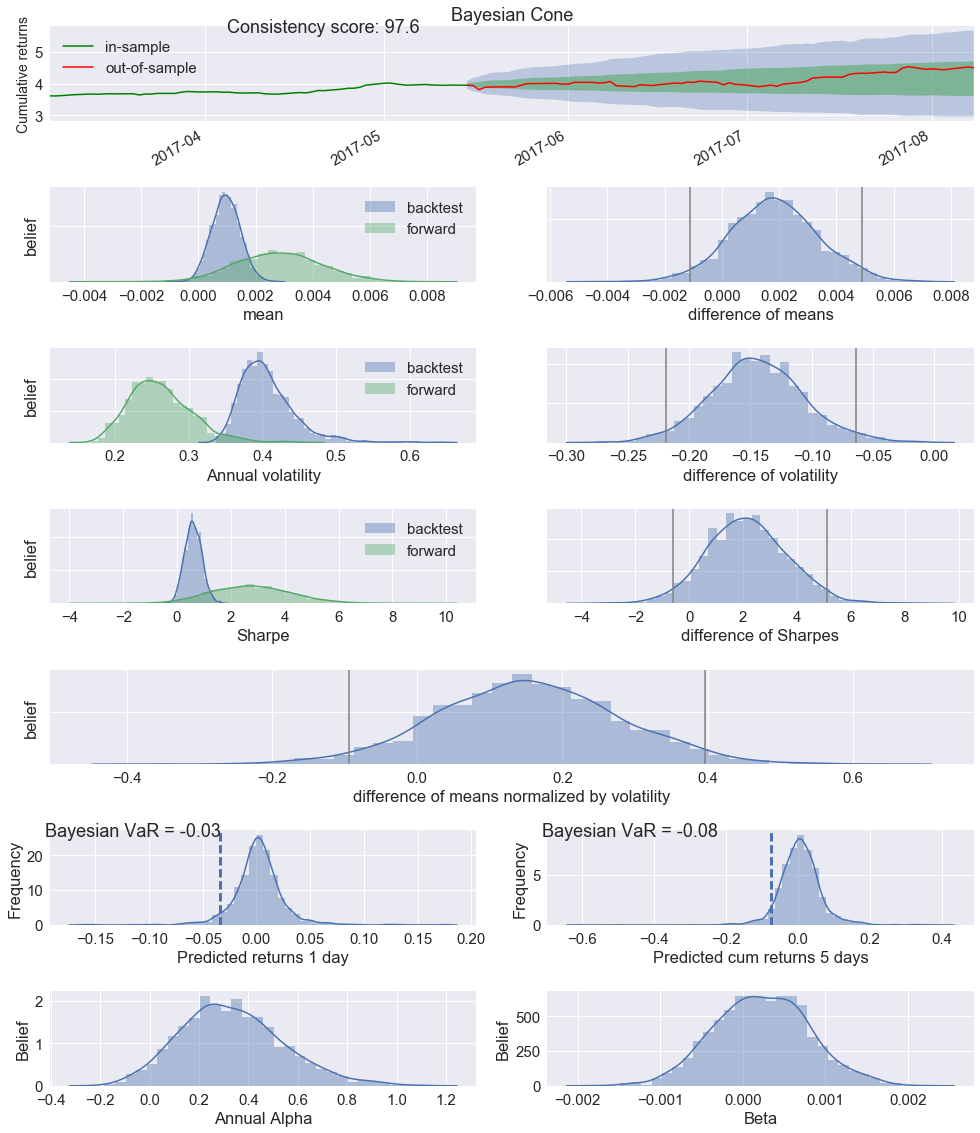

In [6]:
# suppose the last 2 months were our out-of-sample period
out_of_sample = stock_rets.index[-60]

# use pyfolio to run the bayesian tearsheet
# the bayesian tear sheet's back end makes heavy use of pymc3, so there will be
# a lot of graphical output before the actual tear sheet
pf.tears.create_bayesian_tear_sheet(stock_rets, live_start_date=out_of_sample, benchmark_rets=rolling_beta)